I have taken 2 days of data and created a Bloom filter. Using another day of data verified the number of matches using the Bloom filter and plotted graphs

In [1]:
%%writefile twython_streaming.py
import twython
from twython import TwythonStreamer

OAUTH_TOKEN = "925147250350854144-GnFORz7Z7E5EmsEyFvMEVJxocfzLDNj"
OAUTH_TOKEN_SECRET = "PlCOVjUK0EpM9fQ9C4FiNFXI3vIGsICJDlQCiKKtVkYTT"
APP_KEY = "cRPqloj4il7LVOyULvn3GLEKb"
APP_SECRET = "0QHOZY5fdMwJGVLBf9HNjYKn0SbZyFaLJddY1SaHbi7ICO2Zyn"

class MyStreamer(TwythonStreamer):
    def on_success(self, data):
        if 'text' in data:
            print data['text'].encode('utf-8')

    def on_error(self, status_code, data):
        print status_code

        # Want to stop trying to get data because of the error?
        # Uncomment the next line!
        self.disconnect()

if __name__ == "__main__":
    stream = MyStreamer(APP_KEY, APP_SECRET,
                    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    stream.statuses.filter(track=['iphone', 'pixel', 'samsung'])

Overwriting twython_streaming.py


In [ ]:
! python twython_streaming.py >> twython_twits_test.txt

In [11]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import nltk
filename=open("twython_twits.txt","r")
#type(raw) #str
tokens = []
#decoding and tokenizing
for line in filename.readlines():
    line=line.decode('utf-8').strip()
    tokens+=nltk.sent_tokenize(line)

In [3]:
for i in xrange(1, 10):
    print tokens[i]

Pretty Equalizer, I still love my Samsung Note 3: https://t.co/wGTelP0s6M via @YouTube
iPhone X発売で「強気」のクックCEO、10～12月期は7％超増収へ https://t.co/jTTKXvoLnX https://t.co/GGEMxHGBlE
Sandisk Ultra 64GB #Memory #Card in https://t.co/FN6m9iYhuD #news #digital #market #deals #sales #today #iphone… https://t.co/DfeCKyhqNA
Me voy a llevar un iPhone X GRATIS a casa #iPhoneXfree,  https://t.co/WE4GhU5mqm
¿Nos das un RT?
#iphone #ipad #mac 30 nuevos bancos y entidades de crédito americanos ya son...… https://t.co/k2XhtXSuWb
RT @MaxFicarro: Easily the best feature on the iPhone X is the Animoji.
https://t.co/cKorZYYGS7
Me voy a llevar un iPhone X GRATIS a casa #iPhoneXfree,  https://t.co/EpsPAWo4Es


In [4]:
import re
#removing URL's
for idx, tweet in enumerate(tokens):
    tweet = re.sub(r'https:\/\/.*[\r\n]*', '', tweet)
    tokens[idx] = tweet
#print tokens

In [5]:
for i in xrange(1, 10):
    print tokens[i]

Pretty Equalizer, I still love my Samsung Note 3: 
iPhone X発売で「強気」のクックCEO、10～12月期は7％超増収へ 
Sandisk Ultra 64GB #Memory #Card in 
Me voy a llevar un iPhone X GRATIS a casa #iPhoneXfree,  
¿Nos das un RT?
#iphone #ipad #mac 30 nuevos bancos y entidades de crédito americanos ya son...… 
RT @MaxFicarro: Easily the best feature on the iPhone X is the Animoji.

Me voy a llevar un iPhone X GRATIS a casa #iPhoneXfree,  


In [6]:
#number of tweets after cleaning
len(tokens)
#print tokens[1]

2018796

In [7]:
#removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

example_sent = "This is a sample sentence, showing off the stop words filtration."
for idx, cleaned_tweet in enumerate(tokens):
    word_tokens = word_tokenize(cleaned_tweet)
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_tweet.append(w)
    filtered_tweet = ' '.join(filtered_tweet)
    tokens[idx] = filtered_tweet


In [8]:
for i in xrange(1, 10):
    print tokens[i]

Pretty Equalizer , I still love Samsung Note 3 :
iPhone X発売で「強気」のクックCEO、10～12月期は7％超増収へ
Sandisk Ultra 64GB # Memory # Card
Me voy llevar un iPhone X GRATIS casa # iPhoneXfree ,
¿Nos das un RT ?
# iphone # ipad # mac 30 nuevos bancos entidades de crédito americanos ya son ... …
RT @ MaxFicarro : Easily best feature iPhone X Animoji .

Me voy llevar un iPhone X GRATIS casa # iPhoneXfree ,


In [9]:
#training bloomfilter on first 2 days data
from pybloom import BloomFilter

tweet_bloom = BloomFilter(capacity=1000000000, error_rate=0.001)
for cleaned_tweet in tokens:
     _ = tweet_bloom.add(cleaned_tweet)

In [16]:
"Pretty Equalizer , I still  Samsung Note 3 :" in tweet_bloom

False

Another Day Data

In [33]:
import nltk
filename=open("twython_twits_test.txt","r")

test_tokens = []
#decoding and tokenizing
for line in filename.readlines():
    line=line.decode('utf-8').strip()
    test_tokens+=nltk.sent_tokenize(line)

In [34]:
import re
#removing URL's
for idx, test_tweet in enumerate(test_tokens):
    test_tweet = re.sub(r'https:\/\/.*[\r\n]*', '', test_tweet)
    test_tokens[idx] = test_tweet
#print tokens

In [35]:
#number of tweets in test data
len(test_tokens)
#print tokens[1]

127400

In [36]:
#removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

example_sent = "This is a sample sentence, showing off the stop words filtration."
for idx, cleaned_test_tweet in enumerate(test_tokens):
    word_tokens = word_tokenize(cleaned_test_tweet)
    filtered_test_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_test_tweet = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_test_tweet.append(w)
    filtered_test_tweet = ' '.join(filtered_test_tweet)
    test_tokens[idx] = filtered_test_tweet


In [38]:
#Verifying matches and setting flags for matched and unmatched tweets
trueflag = 0
falseflag = 0
for tweet in test_tokens:
    if tweet in tweet_bloom:
        trueflag = trueflag + 1
    else:
        falseflag = falseflag + 1
    
print str(trueflag), str(falseflag)

93811 33589


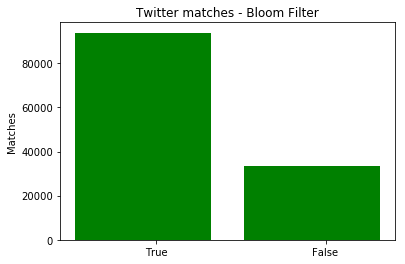

In [52]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
xparams = [True, False]
yparams = [trueflag, falseflag ] 
x_pos = list(range(len(xparams)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, yparams, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Matches')
ax.set_title('Twitter matches - Bloom Filter')
ax.set_xticks([p + 0.1 * width for p in x_pos])
ax.set_xticklabels(xparams)
plt.show()